In [ ]:
!git clone https://github.com/thonangihema/Employee_Attrition_Prediction.git

fatal: destination path 'Employee_Attrition_Prediction' already exists and is not an empty directory.


In [ ]:
!pip install gradio
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


**Reading file**

In [ ]:
# storing data into dataframe df
df=pd.read_csv('/content/Employee_Attrition_Prediction/WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
pd.set_option('display.max_columns',None)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Data types of each column**

In [ ]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**rows and columns in dataset**

In [ ]:
df.shape

(1470, 35)

**Checking for Null or missing values**

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**checking for Duplicates**

In [ ]:
#chech duplicate
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(len(df))

False    1470
dtype: int64
1470


**Exploring data analysis**

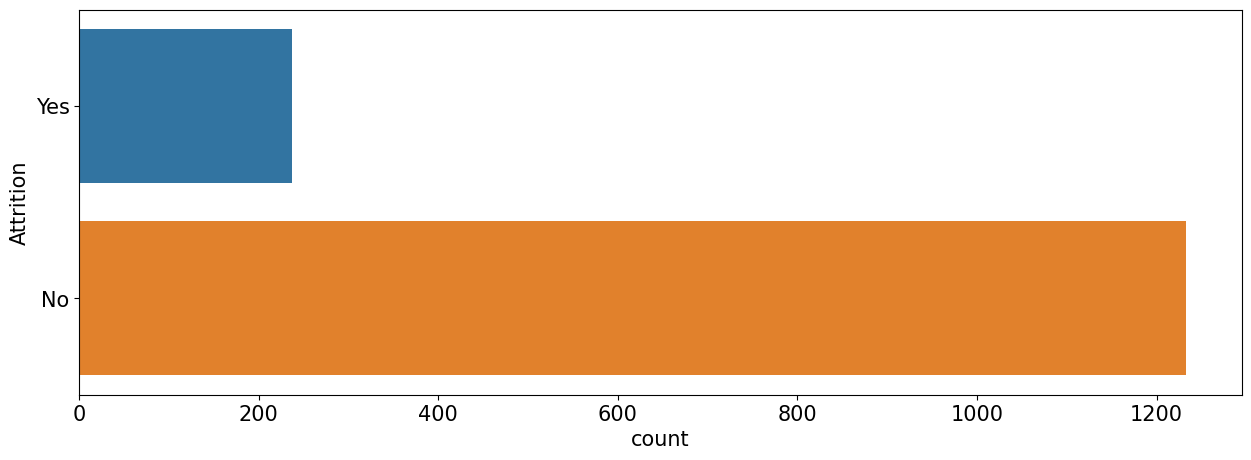

In [ ]:
#imbalenced dataset
plt.figure(figsize=(15,5))
plt.rc("font",size=15)
sns.countplot(y="Attrition",data=df)
plt.show()

**checking for columns containing single unique category**

In [ ]:
df.nunique().sort_values(ascending=True).reset_index(name= "Column unique count")

,index,Column unique count
0,Over18,1
1,StandardHours,1
2,EmployeeCount,1
3,Gender,2
4,Attrition,2
5,PerformanceRating,2
6,OverTime,2
7,MaritalStatus,3
8,Department,3
9,BusinessTravel,3


**converting object type Attrition column into numeric**

In [ ]:
df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})

**Analysis between Attrition and Categorical Features**

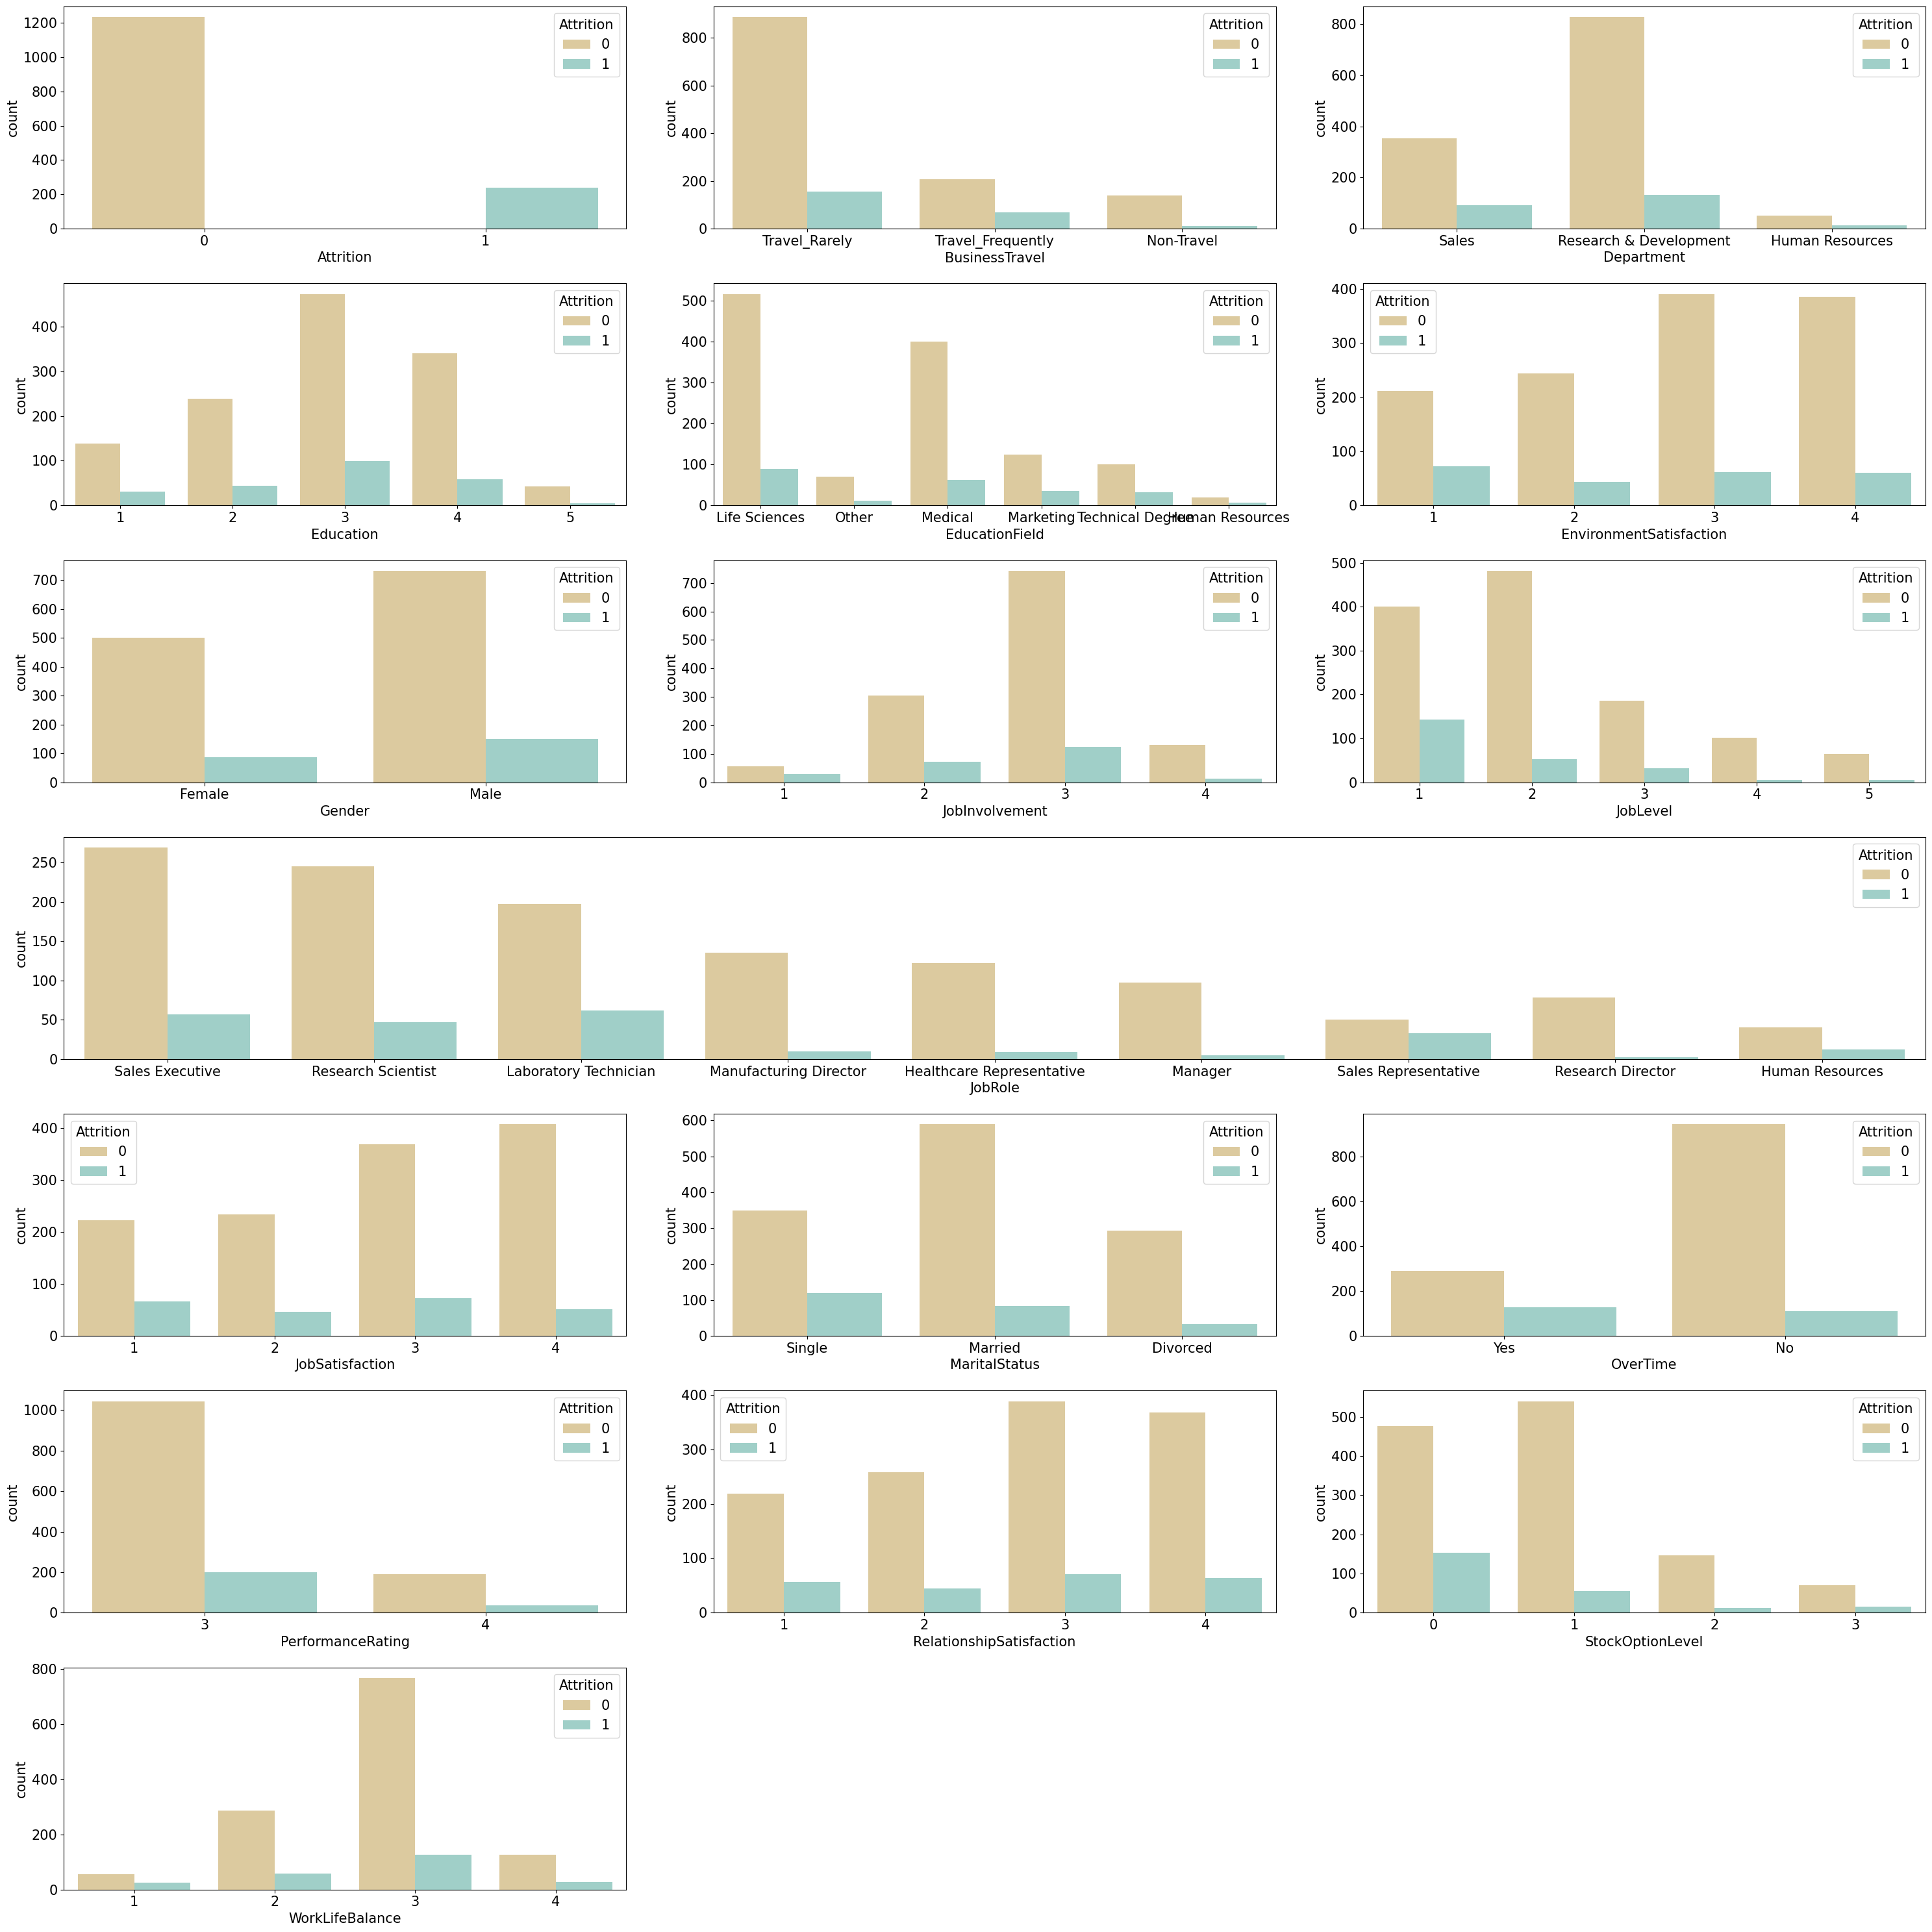

In [ ]:
import matplotlib.gridspec as gridspec
cl = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']
plt.figure(figsize=(30,30))
gridspec.GridSpec(7, 3)
locator1, locator2 = [0, 0]
for column in cl:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()

**Droping unique columns**


In [ ]:
# Remove some useless columns
df= df.drop(columns=["EmployeeCount", "Over18","StandardHours"])

**identifing highly corelated features**

In [ ]:
datac=df.corr()
datac

<ipython-input-192-dcab0466e024>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datac=df.corr()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<ipython-input-193-b553e22c9718>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Greys", annot_kws={"size":15})


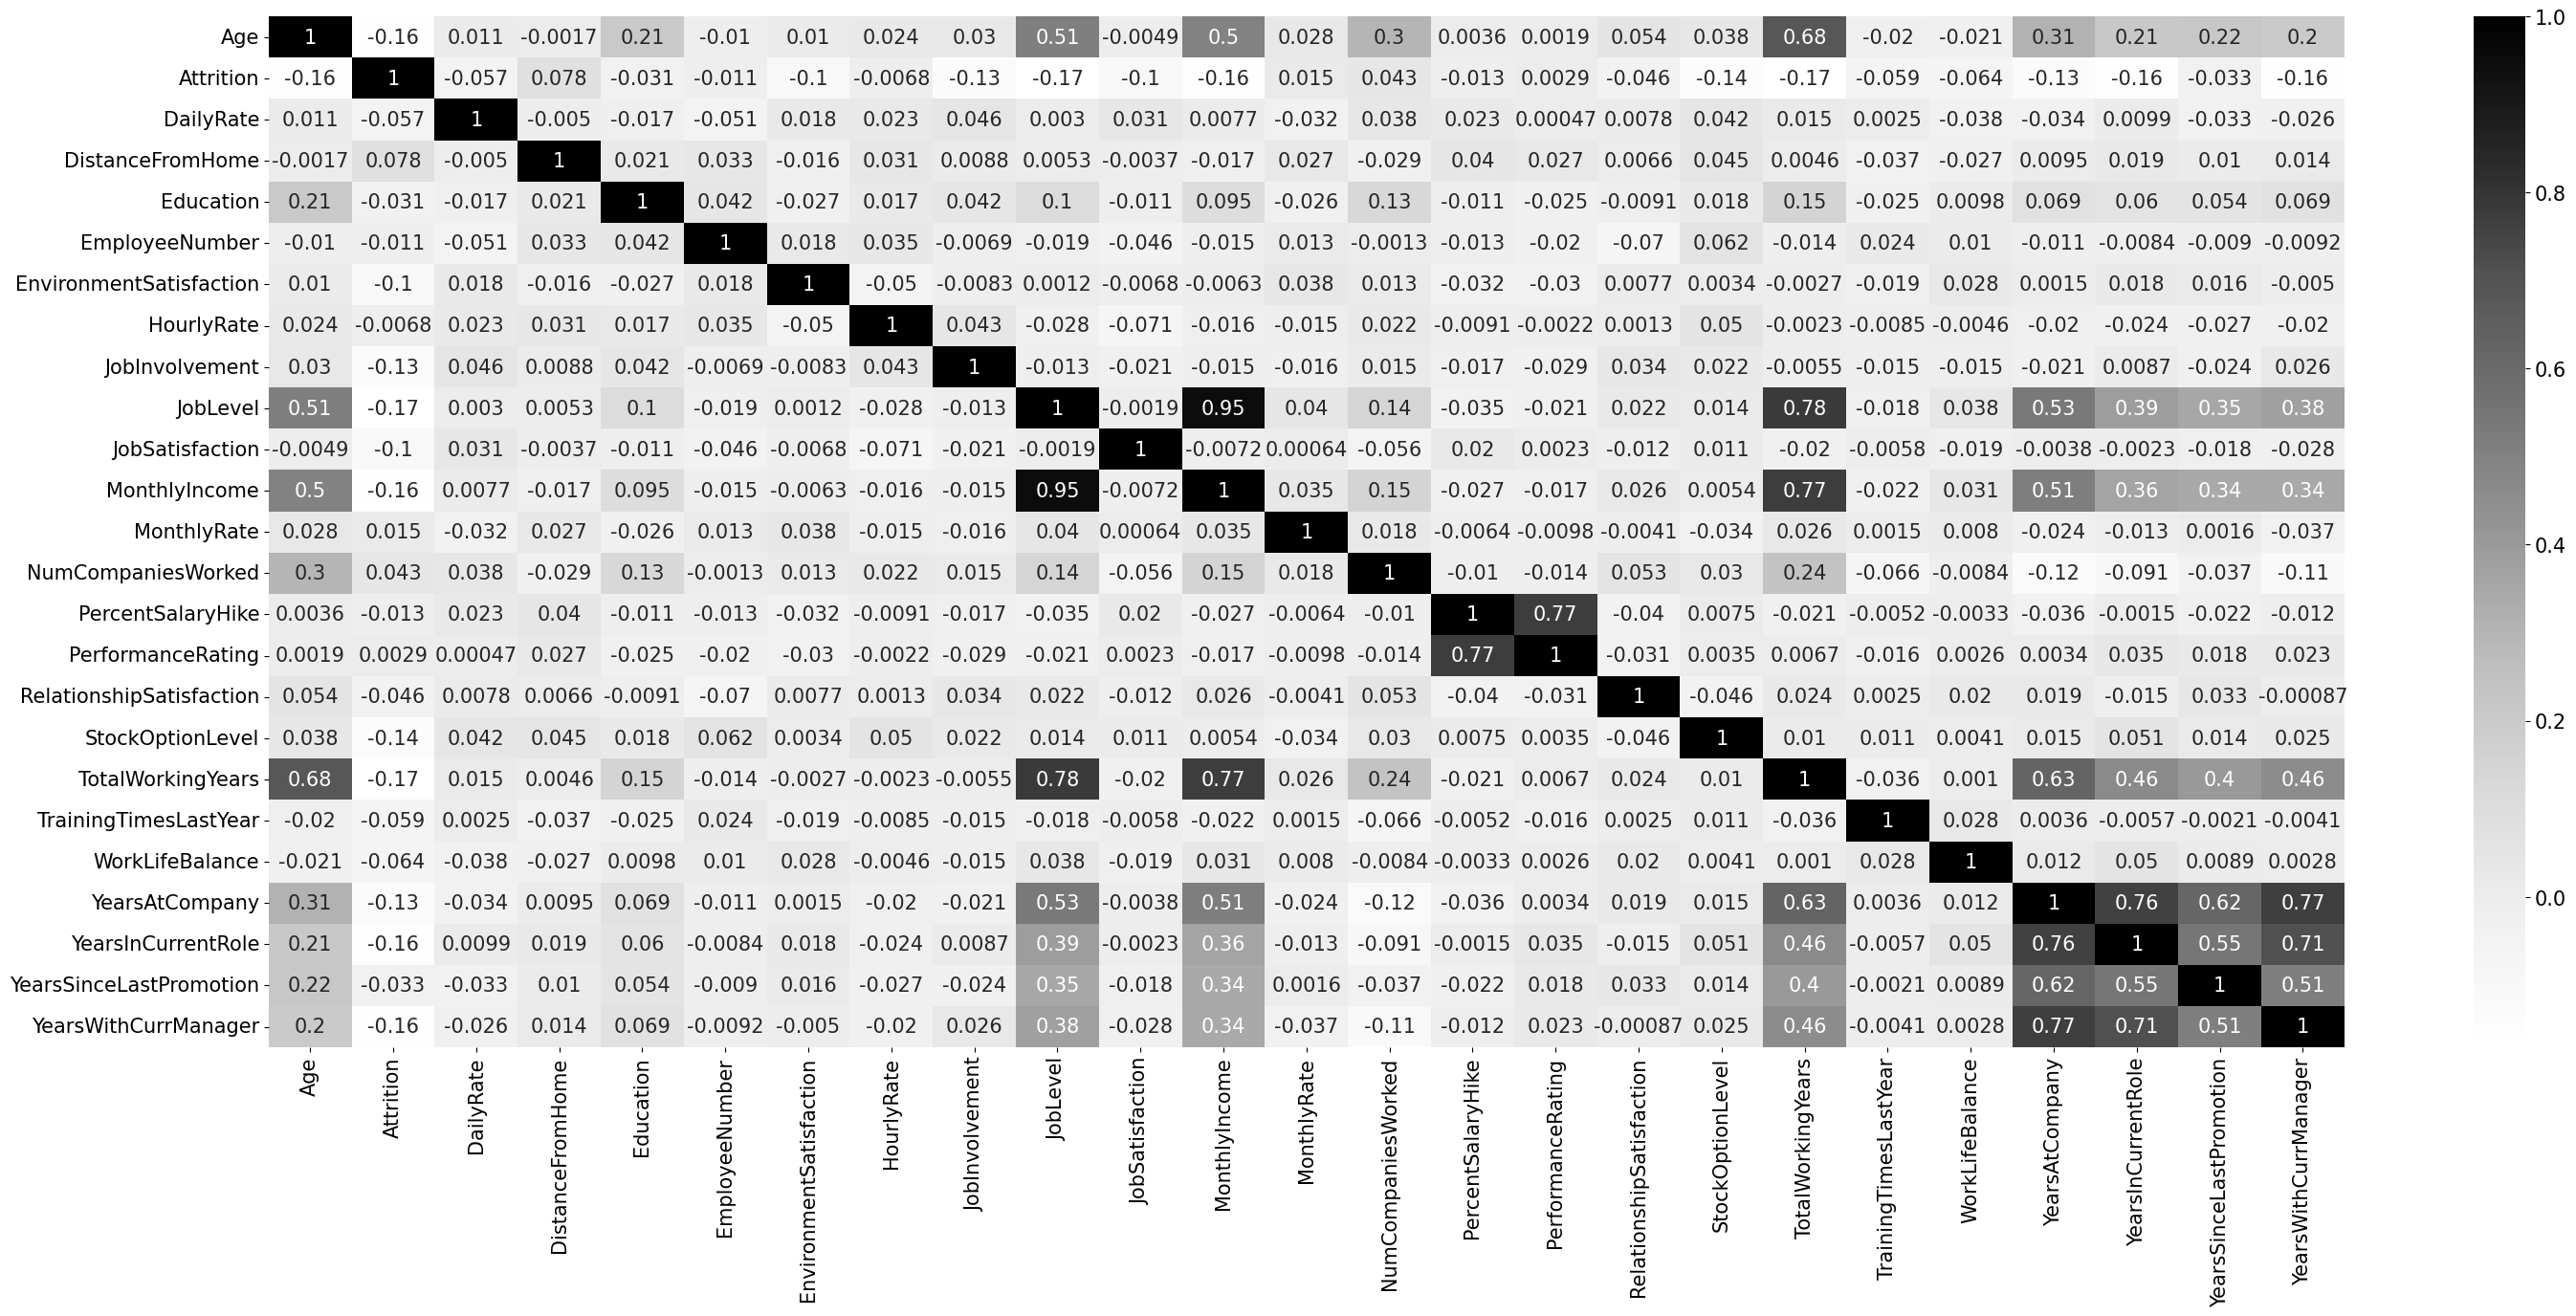

In [ ]:
# visualize the correlation
plt.figure(figsize=(35,14))
sns.heatmap(df.corr(), annot=True, cmap="Greys", annot_kws={"size":15})
plt.show()

**Checking and droping highly correleated feature greater than 0.95**

In [ ]:
#Find features with correlation greater than 0.95
upper = datac.where(np.triu(np.ones(datac.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

<ipython-input-194-20a2e32ec344>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = datac.where(np.triu(np.ones(datac.shape), k=1).astype(np.bool))


['MonthlyIncome']

In [ ]:
df= df.drop(columns=["MonthlyIncome","EmployeeNumber"])
df.shape

(1470, 30)

**Categorical Columns**

In [ ]:
categorical=df.select_dtypes(include= ["object"])
categorical.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

**Label encoding**

In [ ]:
#label encoding
# Create a dictionary to store the mapping between categories and their numerical values for each attribute
mapp = {}
# Loop over each attribute and perform label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        mapp[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping for each attribute
print(mapp)

{'BusinessTravel': {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}, 'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}, 'EducationField': {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}, 'Gender': {'Female': 0, 'Male': 1}, 'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}, 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}, 'OverTime': {'No': 0, 'Yes': 1}}


**Ordinal columns**

In [ ]:
ordinal_data=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df[ordinal_data].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [ ]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

 **X & Y split and Sampling**

In [ ]:
y=df.Attrition
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
x=df.drop(['Attrition'],axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


**resample to balance dataset**

In [ ]:
print(Counter(y))
r=RandomOverSampler(random_state=42)
X_over,Y_over=r.fit_resample(x,y)
print(Counter(Y_over))


Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


# **Model Building**

**Random Forest**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, classification_report, roc_auc_score
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)



In [ ]:
rf1 = RandomForestClassifier(n_estimators=50)
#training the model
rf1.fit(x_train,y_train)
prediction=rf1.predict(x_test)

In [ ]:
Accuracy_rf1 = accuracy_score(y_test, prediction)

In [ ]:
print(Accuracy_rf1)

0.8662131519274376


# **Feature Selection**

**select K-Best**

In [ ]:
Kb= SelectKBest(score_func=chi2,k=10)
fittedkb = Kb.fit(x, y)
dfkb = pd.DataFrame({"Feauture": x.columns, "Select-K-Best Score": fittedkb.scores_})
dfkb

,Feauture,Select-K-Best Score
0,Age,84.155277
1,BusinessTravel,0.000002
2,DailyRate,956.580494
3,Department,1.329297
4,DistanceFromHome,63.772142
5,Education,0.520642
6,EducationField,0.834912
7,EnvironmentSatisfaction,6.890594
8,Gender,0.510087
9,HourlyRate,0.431779


**RFE**

In [ ]:
rfc = RandomForestClassifier()
rferfc = RFE(rfc,n_features_to_select=5)
rferfc.fit(x, y)
dfrf = pd.DataFrame({"Column name": x.columns, "Feature": rferfc.support_})
dfrf


,Column name,Feature
0,Age,True
1,BusinessTravel,False
2,DailyRate,True
3,Department,False
4,DistanceFromHome,False
5,Education,False
6,EducationField,False
7,EnvironmentSatisfaction,False
8,Gender,False
9,HourlyRate,True


**Feature importance by decision Tree**

In [ ]:
dtreef = DecisionTreeClassifier()
dtreef.fit(x, y)
dfdt = pd.DataFrame({"Feauture": x.columns, "Importance": dtreef.feature_importances_})
dfdt

,Feauture,Importance
0,Age,0.069213
1,BusinessTravel,0.004402
2,DailyRate,0.073051
3,Department,0.006361
4,DistanceFromHome,0.052448
5,Education,0.007748
6,EducationField,0.007900
7,EnvironmentSatisfaction,0.041073
8,Gender,0.013162
9,HourlyRate,0.070718


**Feature importance by random forest**

In [ ]:
rfcf = RandomForestClassifier()
rfcf.fit(x, y)
dfrd = pd.DataFrame({"Feauture": x.columns, "Importance": rfcf.feature_importances_})
dfrd

,Feauture,Importance
0,Age,0.062767
1,BusinessTravel,0.015850
2,DailyRate,0.060501
3,Department,0.013144
4,DistanceFromHome,0.053181
5,Education,0.019908
6,EducationField,0.027214
7,EnvironmentSatisfaction,0.031491
8,Gender,0.009259
9,HourlyRate,0.055696


# **Selecting the features**

In [ ]:
Feature_selection = pd.DataFrame({"Columns": x.columns, "Select-K-Best Score": fittedkb.scores_,
                                  "Importance->Decision Tree": dtreef.feature_importances_, "Importance->RandomForest": rfcf.feature_importances_,"RFE-Support": rferfc.support_ })
Feature_selection=Feature_selection.sort_values(by=['Select-K-Best Score'], ascending=False)
cm = sns.light_palette("red", as_cmap=True)
Featureselection =  Feature_selection.style.background_gradient(cmap=cm)
Featureselection

,Columns,Select-K-Best Score,Importance->Decision Tree,Importance->RandomForest,RFE-Support
15,MonthlyRate,1196.633553,0.073352,0.052487,True
2,DailyRate,956.580494,0.073051,0.060501,True
22,TotalWorkingYears,230.721618,0.056298,0.059042,True
25,YearsAtCompany,142.100054,0.016016,0.046564,False
26,YearsInCurrentRole,117.522596,0.011240,0.029343,False
28,YearsWithCurrManager,110.671534,0.031971,0.031154,False
0,Age,84.155277,0.069213,0.062767,True
17,OverTime,63.845067,0.060574,0.056504,False
4,DistanceFromHome,63.772142,0.052448,0.053181,False
21,StockOptionLevel,25.268826,0.000000,0.030458,False


In [ ]:
x_train= x_train.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome','StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion','JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement','HourlyRate', 'PercentSalaryHike']]

x_test= x_test.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome','StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement','HourlyRate', 'PercentSalaryHike']]

In [ ]:
x_train.shape

(1029, 19)

In [ ]:
x_test.shape

(441, 19)

In [ ]:
x_test.head()

,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,NumCompaniesWorked,JobInvolvement,HourlyRate,PercentSalaryHike
1041,866,6,5,4,3,28,0,5,0,2,2,7,1,1,4,0,3,84,18
184,1084,5,4,2,3,53,0,13,2,2,0,4,1,1,4,1,4,57,11
1222,240,1,1,0,0,24,0,22,1,1,1,1,0,3,4,1,1,58,11
67,1339,25,1,0,0,45,0,7,1,3,0,6,0,1,2,2,3,59,17
220,1396,16,13,11,7,36,0,5,0,2,2,2,3,2,4,8,3,62,16


**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train, y_train)
predlog = log.predict(x_test)
Acclog = accuracy_score(y_test, predlog)
print("Logistic Regression")
print('Accuracy_Score', Acclog)

Logistic Regression
Accuracy_Score 0.854875283446712


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
preddt = dtree.predict(x_test)
Accdt = accuracy_score(y_test, preddt)
print("Decision tree")
print('Accuracy_Score', Accdt)

Decision tree
Accuracy_Score 0.7981859410430839


**SVC**




In [ ]:
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(x_train, y_train)
predsvc = svc_model.predict(x_test)
Accsvc = accuracy_score(y_test, predsvc)
print("SVC")
print('Accuracy_Score', Accsvc)


SVC
Accuracy_Score 0.8616780045351474


**Random Forest**

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30)
rf2.fit(x_train, y_train)
predrfc = rf2.predict(x_test)
Accrfc= accuracy_score(y_test, predrfc)
print(Accrfc)

0.8639455782312925


**confusion metrix**

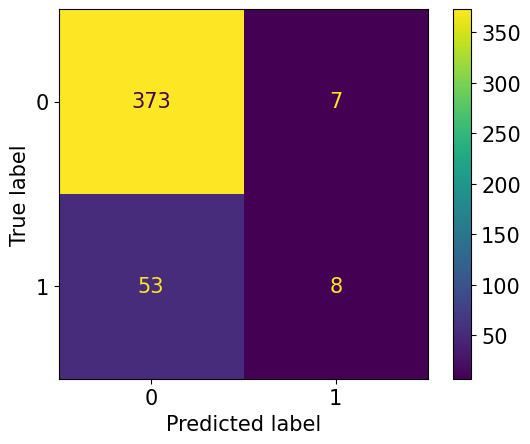

In [ ]:
cm = confusion_matrix(y_test, predrfc, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf2.classes_)
disp.plot()
plt.show()

In [ ]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print(' accuracy score for the model on the data = {}'.format( (TP + TN) / (TP + TN + FN + FP)))

[[373   7]
 [ 53   8]]
 accuracy score for the model on the data = 0.8639455782312925


**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=50)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
accuracy_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Accuracy_Score', accuracy_score)

Accuracy_Score 0.8684807256235828


In [ ]:
import joblib
joblib.dump(xg, 'y_pred.joblib')

['y_pred.joblib']

**ROC CURVE**

<ipython-input-225-c354da441862>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Classifier')


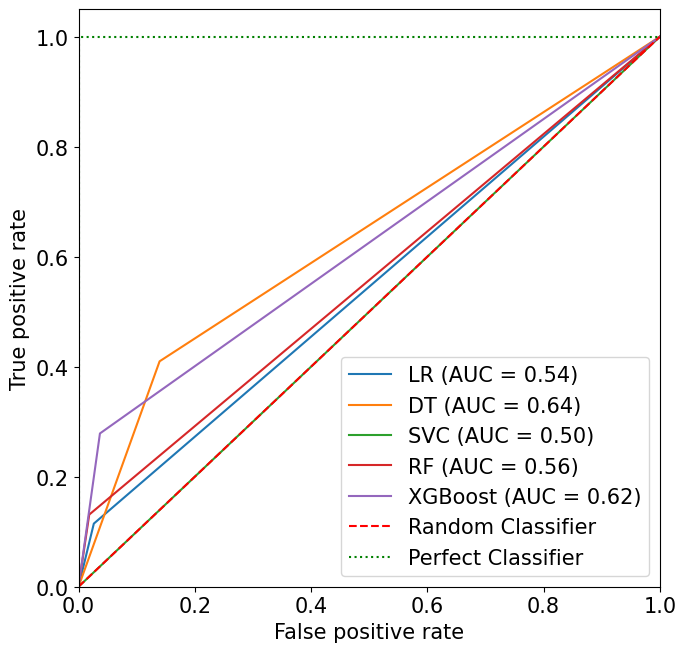

In [ ]:
#Make predictions
m1, n1, thresholds = roc_curve(y_test,predlog, pos_label=1)
roc_auc1 = auc(m1, n1)
m2, n2, thresholds = roc_curve(y_test, preddt, pos_label=1)
roc_auc2 = auc(m2, n2)
m3, n3, thresholds = roc_curve(y_test,predsvc, pos_label=1)
roc_auc3 = auc(m3, n3)
m4, n4, thresholds = roc_curve(y_test,predrfc, pos_label=1)
roc_auc4 = auc(m4, n4)
m5, n5, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc5 = auc(m5, n5)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(m1, n1, label='LR (AUC = %0.2f)' % (roc_auc1))
plt.plot(m2, n2, label='DT (AUC = %0.2f)' % (roc_auc2))
plt.plot(m3, n3, label='SVC (AUC = %0.2f)' % (roc_auc3))
plt.plot(m4, n4, label='RF (AUC = %0.2f)' % (roc_auc4))
plt.plot(m5, n5, label='XGBoost (AUC = %0.2f)' % (roc_auc5))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

**Classification Report of Logistic regression**

In [ ]:
print(classification_report(y_test,predlog))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.41      0.11      0.18        61

    accuracy                           0.85       441
   macro avg       0.64      0.54      0.55       441
weighted avg       0.81      0.85      0.82       441



**Classification Report of Decision Tree**


In [ ]:
print(classification_report(y_test,preddt))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       380
           1       0.32      0.41      0.36        61

    accuracy                           0.80       441
   macro avg       0.61      0.64      0.62       441
weighted avg       0.82      0.80      0.81       441



**Classification Report of SVC**

In [ ]:
print(classification_report(y_test,predsvc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Classification Report of XGBoost**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       380
           1       0.55      0.28      0.37        61

    accuracy                           0.87       441
   macro avg       0.72      0.62      0.65       441
weighted avg       0.85      0.87      0.85       441



# **Using Gradio Testing**

In [ ]:
!sudo apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [ ]:
#!pip install gradio

In [ ]:
!pip show gradio

Name: gradio
Version: 4.7.1
Summary: Python library for easily interacting with trained machine learning models
Home-page: 
Author: 
Author-email: Abubakar Abid <team@gradio.app>, Ali Abid <team@gradio.app>, Ali Abdalla <team@gradio.app>, Dawood Khan <team@gradio.app>, Ahsen Khaliq <team@gradio.app>, Pete Allen <team@gradio.app>, Ömer Faruk Özdemir <team@gradio.app>, Freddy A Boulton <team@gradio.app>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiofiles, altair, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, importlib-resources, jinja2, markupsafe, matplotlib, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, requests, semantic-version, tomlkit, typer, typing-extensions, uvicorn
Required-by: 


In [ ]:
!pip install typing-extensions==3.10.0.2

  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
sqlalchemy 2.0.23 requires typing-extensions>=4.2.0, but you have typing-extensions 3.10.0.2 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.2 which is incompatible.
chex 0.1.7 requires typing-extensions>=4.2.0; python_version < "3.11", but you have typing-extensions 3.10.0.2 which is incompatible.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 3.10.0.2 which is incompatible.
flax 0.7.5 requires typing-extens

In [ ]:
import gradio as gr

In [ ]:
def outcome(dailyRate,totalWorkingYears,yearsAtCompany,yearsInCurrentRole,yearsWithCurrManager, age, overTime,distanceFromHome,stockOptionLevel,jobLevel,maritalStatus, jobRole ,yearsSinceLastPromotion,jobSatisfaction,environmentSatisfaction,numCompaniesWorked,jobInvolvement,hourlyRate,percentSalaryHike):
  global mapp
  overTime= mapp['OverTime'][overTime]
  maritalStatus=mapp['MaritalStatus'][maritalStatus]
  jobRole=mapp['JobRole'][jobRole]
  sample=np.array([dailyRate,totalWorkingYears,yearsAtCompany,yearsInCurrentRole,yearsWithCurrManager, age, overTime,distanceFromHome,stockOptionLevel,jobLevel,maritalStatus, jobRole ,yearsSinceLastPromotion,jobSatisfaction,environmentSatisfaction,numCompaniesWorked,jobInvolvement,hourlyRate,percentSalaryHike]).reshape(1,-1)
  prediction=xg.predict(sample)
  if(prediction[0]==1):
    return "Employee will Leave"
  else:
    return "Employee will stay"


In [ ]:
val = outcome(1102,8,6,4,5,41,'Yes',1,0,2,'Single','Sales Executive',0,4,2,8,3,94,11)
print(val)

Employee will Leave


In [ ]:
print(outcome(279,10,10,7,7,49,'No',8,1,2,'Married','Research Scientist',1,2,3,1,2,61,23))

Employee will stay


In [ ]:
demo = gr.Interface(
    fn=outcome,
    inputs=["number", "number", "number", "number", "number", "number", "text", "number", "number", "number", "text",
            "text", "number", "number", "number", "number", "number", "number", "number"],
    outputs="text",
    title="Employee Attrition Prediction",
    theme="compact"
)

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:528: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


In [ ]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7316ceeec3c265f5f8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Deep learning Models**

 **ANN**

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = tf.keras.models.Sequential([ tf.keras.layers.Dense(32, activation='relu',input_shape=(x_train.shape[1],)),
                                    tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(16, activation='relu'),
                                     tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(1, activation='sigmoid') ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50,batch_size=32,validation_split=0.1)
ann_pred = model.predict(x_test)
ann_pred = (ann_pred > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, ann_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, ann_pred))
print("Classification report:\n", classification_report(y_test, ann_pred))

Epoch 1/50
29/29 [==============================] - 5s 52ms/step - loss: 0.7058 - accuracy: 0.5734 - val_loss: 0.5572 - val_accuracy: 0.7670
Epoch 2/50
29/29 [==============================] - 0s 15ms/step - loss: 0.5343 - accuracy: 0.7808 - val_loss: 0.4844 - val_accuracy: 0.7961
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 0.4975 - accuracy: 0.8143 - val_loss: 0.4478 - val_accuracy: 0.8058
Epoch 4/50
29/29 [==============================] - 0s 13ms/step - loss: 0.4628 - accuracy: 0.8272 - val_loss: 0.4279 - val_accuracy: 0.8058
Epoch 5/50
29/29 [==============================] - 0s 17ms/step - loss: 0.4377 - accuracy: 0.8272 - val_loss: 0.4096 - val_accuracy: 0.8058
Epoch 6/50
29/29 [==============================] - 1s 17ms/step - loss: 0.4291 - accuracy: 0.8326 - val_loss: 0.3939 - val_accuracy: 0.8058
Epoch 7/50
29/29 [==============================] - 0s 15ms/step - loss: 0.4108 - accuracy: 0.8369 - val_loss: 0.3853 - val_accuracy: 0.8058
Epoch 8/50
29

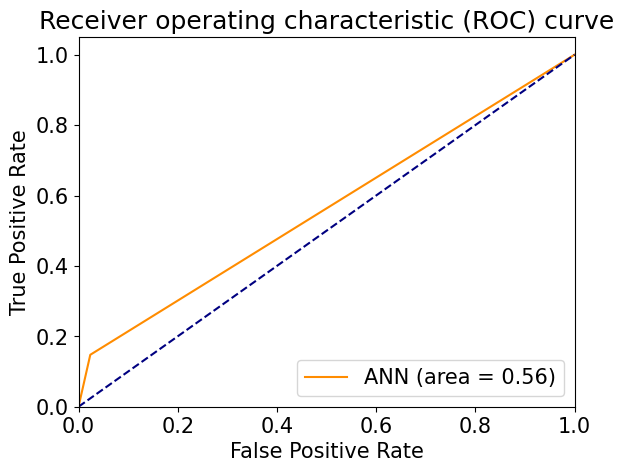

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ann_pred)
# Compute the area under the curve (auc) using the trapezoidal rule
auc = auc(fpr, tpr)
# Plot the ROC curve using matplotlib.pyplot
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ANN (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

 **LSTM**

In [ ]:
# Reshape the data for LSTM input
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train= x_train.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome','StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion','JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement','HourlyRate', 'PercentSalaryHike']]

x_test= x_test.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome','StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement','HourlyRate', 'PercentSalaryHike']]
x_train = x_train.to_numpy().reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.to_numpy().reshape(x_test.shape[0], 1, x_test.shape[1])
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])), # The first LSTM layer with 32 units and return sequences as True
    tf.keras.layers.Dropout(0.2), # A dropout layer to prevent overfitting
    tf.keras.layers.LSTM(16), # The second LSTM layer with 16 units
    tf.keras.layers.Dropout(0.2), # Another dropout layer to prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid') # The output layer with 1 unit and sigmoid activation function
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)
# Predict the test set
lstm_pred = model.predict(x_test)
lstm_pred_proba = model.predict(x_test)
lstm_pred= (lstm_pred > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, lstm_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, lstm_pred))
print("Classification report:\n", classification_report(y_test,lstm_pred))


Epoch 1/50
34/34 [==============================] - 19s 74ms/step - loss: 0.6842 - accuracy: 0.5888 - val_loss: 0.6529 - val_accuracy: 0.7966
Epoch 2/50
34/34 [==============================] - 0s 12ms/step - loss: 0.6111 - accuracy: 0.8355 - val_loss: 0.5790 - val_accuracy: 0.7966
Epoch 3/50
34/34 [==============================] - 1s 15ms/step - loss: 0.5281 - accuracy: 0.8355 - val_loss: 0.5158 - val_accuracy: 0.7966
Epoch 4/50
34/34 [==============================] - 0s 12ms/step - loss: 0.4716 - accuracy: 0.8355 - val_loss: 0.5046 - val_accuracy: 0.7966
Epoch 5/50
34/34 [==============================] - 0s 10ms/step - loss: 0.4516 - accuracy: 0.8355 - val_loss: 0.5043 - val_accuracy: 0.7966
Epoch 6/50
34/34 [==============================] - 0s 11ms/step - loss: 0.4565 - accuracy: 0.8355 - val_loss: 0.5080 - val_accuracy: 0.7966
Epoch 7/50
34/34 [==============================] - 0s 11ms/step - loss: 0.4523 - accuracy: 0.8355 - val_loss: 0.5087 - val_accuracy: 0.7966
Epoch 8/50
3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
joblib.dump(lstm_pred, 'l_pred.joblib')

['l_pred.joblib']

**DNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)
x_train= x_train.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome','StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion','JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement','HourlyRate', 'PercentSalaryHike']]
x_test= x_test.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome','StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement','HourlyRate', 'PercentSalaryHike']]
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Predict the test set probabilities
pred_proba = model.predict(x_test)
# Calculate the AUC
auc = roc_auc_score(y_test, pred_proba)
print("AUC:", auc)
# Calculate the ROC curve


Epoch 1/50
33/33 [==============================] - 1s 9ms/step - loss: 0.4713 - accuracy: 0.8027 - val_loss: 0.3875 - val_accuracy: 0.8617
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3956 - accuracy: 0.8406 - val_loss: 0.3713 - val_accuracy: 0.8662
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.8523 - val_loss: 0.3623 - val_accuracy: 0.8662
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.8562 - val_loss: 0.3582 - val_accuracy: 0.8685
Epoch 5/50
33/33 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.8591 - val_loss: 0.3563 - val_accuracy: 0.8662
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 0.3498 - accuracy: 0.8601 - val_loss: 0.3538 - val_accuracy: 0.8662
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8678 - val_loss: 0.3548 - val_accuracy: 0.8662
Epoch 8/50
33/33 [==

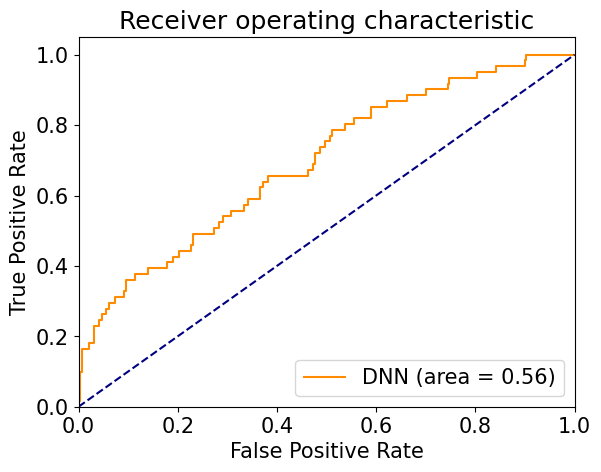

In [ ]:
# Import the necessary modules
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


f, t, thresholds = roc_curve(y_test,pred_proba)
rocdnn = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(f, t, color='darkorange', label='DNN (area = %0.2f)' % rocdnn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


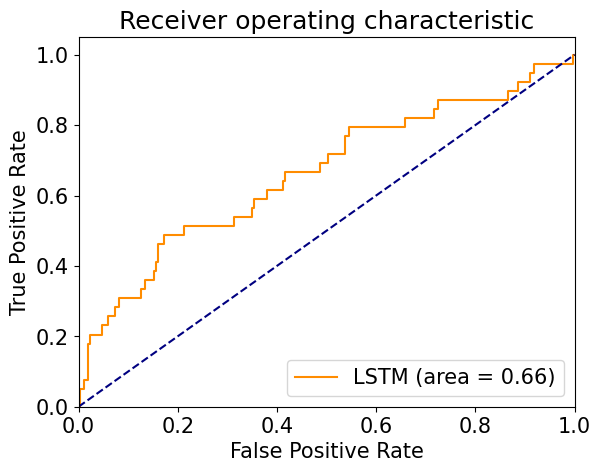

In [ ]:
# Import the necessary modules
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


f1, t1, thresholds = roc_curve(y_test, lstm_pred_proba)
roc_lstm = auc(f1, t1)
# Plot the ROC curve
plt.figure()
plt.plot(f1, t1, color='darkorange', label='LSTM (area = %0.2f)' % roc_lstm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

